In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stats = pd.read_csv("stats.csv")

In [3]:
stats.groupby(by="message").mean()["latency"]

message
Commit time                          8.325334
End Transaction Time                 0.004178
End pusher time                      0.007963
End txn response pusher time         0.007982
Overall commit version index time    0.001181
Phase 1 2PC Time                     0.633337
Phase 2 2PC Time                     0.517343
Read time                            0.001052
Router Lookup time                   0.559544
Router pusher time                   0.008887
Start Txn Time                       0.002717
Storage write index time             4.329021
Validate pusher time                 0.008719
Validation Time                      0.009704
Validation response pusher time      0.007330
Write time                           0.001096
Write to Storage time                0.027420
Name: latency, dtype: float64

In [4]:
stats.groupby(by="tid").sum()["latency"]

tid
bb9eca6c                                                                       4329.020723
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-005468ad-31b0-47d3-784f-abf250623c49       9.190453
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-007737b1-60d4-4d20-58b2-27662819d896       9.657999
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-00ee55b1-0a49-48f2-5ee5-384ac222b1cd       9.229660
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-013dbefa-50da-4161-4ec3-5de463ec4e4d       9.879109
                                                                                  ...     
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-fe520166-1075-40e6-7fd7-99181246fc7e       9.395830
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-feae98c4-7bb8-4179-7a2f-17ed17e9b7f1       8.932604
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-fefd76dc-3262-4982-5c64-af60ab1bd731       9.577911
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-ff9ce997-0e04-4baf-4f3e-96b8b1d91dcb       9.529544
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-ffa0082b-2b2f-4820-53f6-65ce8fd836ed       9.89

In [6]:
stats[stats["tid"]=="bb9eca6c"]

,Unnamed: 0,tid,message,latency,type,address
39,39,bb9eca6c,Storage write index time,25.921911,KEY,52.91.11.241
40,40,bb9eca6c,Storage write index time,21.787734,KEY,52.91.11.241
41,41,bb9eca6c,Storage write index time,18.706548,KEY,52.91.11.241
42,42,bb9eca6c,Storage write index time,42.039040,KEY,52.91.11.241
43,43,bb9eca6c,Storage write index time,22.589914,KEY,52.91.11.241
...,...,...,...,...,...,...
5817,5817,bb9eca6c,Storage write index time,3.609075,KEY,52.91.11.241
5818,5818,bb9eca6c,Storage write index time,3.513616,KEY,52.91.11.241
5819,5819,bb9eca6c,Storage write index time,3.541631,KEY,52.91.11.241
5820,5820,bb9eca6c,Storage write index time,3.703912,KEY,52.91.11.241


In [8]:
stats_new = stats[stats["tid"]!="bb9eca6c"]

In [10]:
stats_new.groupby(by="tid").sum()["latency"]

tid
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-005468ad-31b0-47d3-784f-abf250623c49    9.190453
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-007737b1-60d4-4d20-58b2-27662819d896    9.657999
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-00ee55b1-0a49-48f2-5ee5-384ac222b1cd    9.229660
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-013dbefa-50da-4161-4ec3-5de463ec4e4d    9.879109
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-018817ab-02da-44aa-68b9-874c311944b0    9.861367
                                                                                 ...   
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-fe520166-1075-40e6-7fd7-99181246fc7e    9.395830
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-feae98c4-7bb8-4179-7a2f-17ed17e9b7f1    8.932604
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-fefd76dc-3262-4982-5c64-af60ab1bd731    9.577911
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-ff9ce997-0e04-4baf-4f3e-96b8b1d91dcb    9.529544
bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-ffa0082b-2b2f-4820-53f6-65ce8fd836ed    9.896549
Name: latency, Length: 1000,

In [11]:
latency = list(stats_new.loc[stats['message'] == "Commit time"].groupby("tid").mean()["latency"])[:100]

In [17]:
stats_new.groupby(by="message").mean()["latency"]

message
Commit time                          8.325334
End Transaction Time                 0.004178
End pusher time                      0.007963
End txn response pusher time         0.007982
Overall commit version index time    0.001181
Phase 1 2PC Time                     0.633337
Phase 2 2PC Time                     0.517343
Read time                            0.001052
Router Lookup time                   0.559544
Router pusher time                   0.008887
Start Txn Time                       0.002717
Validate pusher time                 0.008719
Validation Time                      0.009704
Validation response pusher time      0.007330
Write time                           0.001096
Write to Storage time                0.027420
Name: latency, dtype: float64

In [20]:
stats_new.loc[stats['message'] == "Write to Storage time"]

,Unnamed: 0,tid,message,latency,type,address
6079,6079,bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-c15df26...,Write to Storage time,0.084926,TXN,3.81.46.14
6080,6080,bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-e321c9e...,Write to Storage time,0.023680,TXN,3.81.46.14
6081,6081,bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-991419e...,Write to Storage time,0.072828,TXN,3.81.46.14
6082,6082,bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-698b383...,Write to Storage time,0.019890,TXN,3.81.46.14
6083,6083,bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-7db296e...,Write to Storage time,0.098125,TXN,3.81.46.14
...,...,...,...,...,...,...
16995,16995,bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-b79e13d...,Write to Storage time,0.026485,TXN,3.81.46.14
16996,16996,bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-d2cf2b0...,Write to Storage time,0.024099,TXN,3.81.46.14
16997,16997,bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-ce896d1...,Write to Storage time,0.027312,TXN,3.81.46.14
16998,16998,bb9eca6c-6b9d-43f2-6c63-d7d29e806b7b-0-a121cdb...,Write to Storage time,0.022814,TXN,3.81.46.14


In [12]:
pendingKVI = list(stats_new.loc[stats['message'] == "Delete From Pending KVI Time"].groupby("tid").mean()["latency"])[:100]

In [13]:
tids = list(stats_new.groupby("tid").mean().index)[:100]

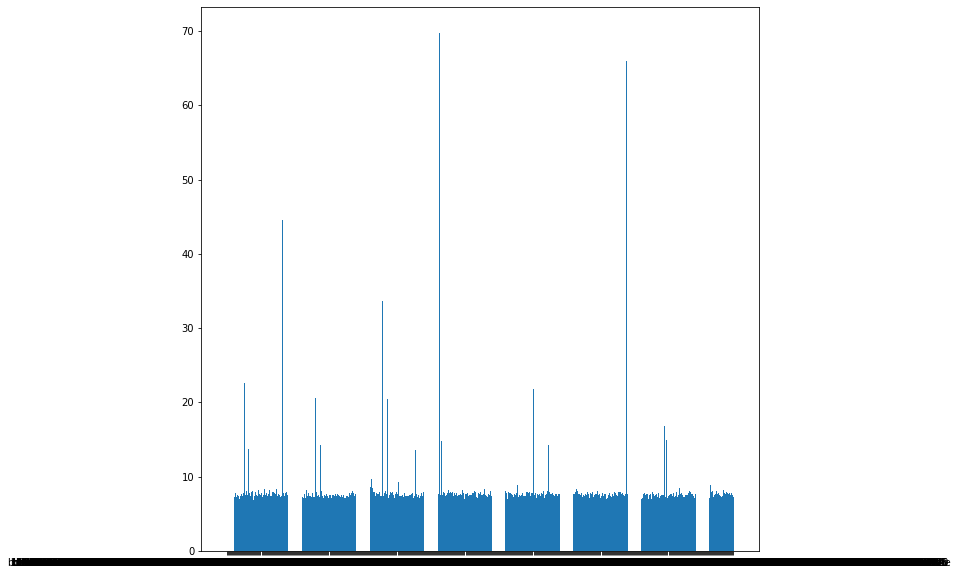

In [14]:
plt.rcParams["figure.figsize"] = (10,10)
plt.bar(tids, latency)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

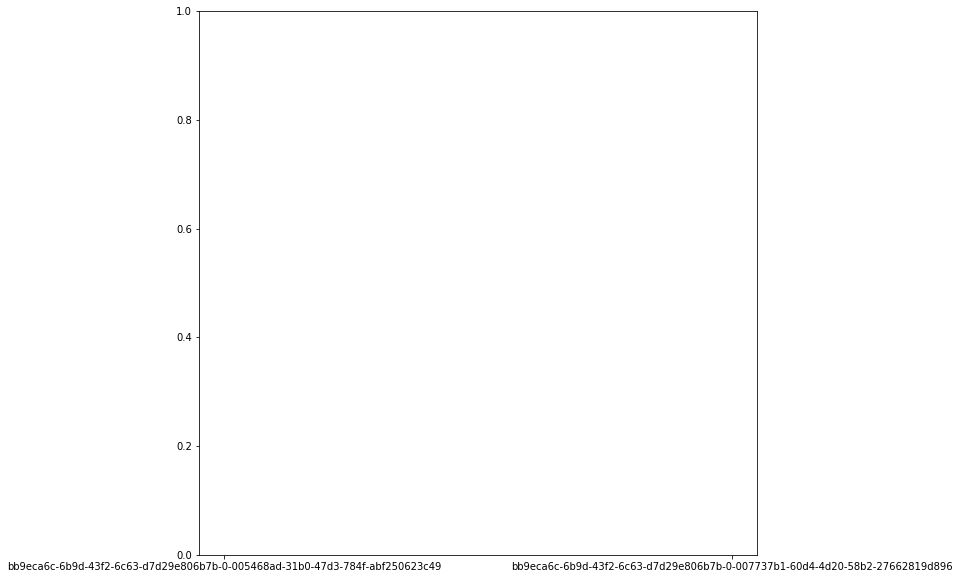

In [15]:
plt.rcParams["figure.figsize"] = (10,10)
plt.bar(tids, pendingKVI)
plt.show()

In [ ]:
tids